In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime as dt

# The path to our CSV file includes only deer-related crash data
file = "Resources/nashville-crash-data-deer-clean.csv"

# Read our CSV data into pandas
df = pd.read_csv(file, parse_dates = ['Date and Time'],na_values=['NA', ' ', '-999'])


In [2]:
#remove data prior to 2010
df[(df['Date and Time'].dt.year >= 2010)]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 29 columns):
Unnamed: 0                    2237 non-null int64
Accident Number               2237 non-null int64
Date and Time                 2237 non-null datetime64[ns]
Number of Motor Vehicles      2236 non-null float64
Number of Injuries            2237 non-null int64
Number of Fatalities          2237 non-null int64
Property Damage               906 non-null object
Hit and Run                   2237 non-null object
Reporting Officer             2237 non-null object
Collision Type Code           2237 non-null int64
Collision Type Description    2237 non-null object
Weather Code                  2237 non-null int64
Weather Description           2237 non-null object
Illumination Code             2232 non-null float64
Illumination Description      2232 non-null object
Harmful Code                  2237 non-null object
Harmful Code Description      2237 non-null object
Street Address         

,Unnamed: 0,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,...,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,month_year,Year,Month
0,24471,2010060248,2010-01-03 03:20:00,1.0,0,0,N,N,468059,2,...,TN,37076.0,8909.0,SOUTH,36.0870,-86.5624,"(36.087, -86.5624)",2010-01,2010,1
1,24412,2010057296,2010-01-04 03:30:00,1.0,0,0,N,N,628640,2,...,TN,37013.0,8719.0,SOUTH,36.0468,-86.6794,"(36.0468, -86.6794)",2010-01,2010,1
2,24811,2010078901,2010-01-11 06:10:00,1.0,0,0,N,N,226811,0,...,TN,37013.0,8767.0,SOUTH,36.0269,-86.6808,"(36.0269, -86.6808)",2010-01,2010,1
3,24940,2010086510,2010-01-13 17:20:00,1.0,0,0,N,N,633385,2,...,TN,37013.0,8767.0,SOUTH,35.9978,-86.6777,"(35.9978, -86.6777)",2010-01,2010,1
4,25359,2010100800,2010-01-18 19:30:00,1.0,0,0,N,N,420035,2,...,TN,37189.0,2105.0,MADISO,36.2871,-86.7825,"(36.2871, -86.7825)",2010-01,2010,1


In [3]:
#Drop nan or blank only in date/time column
df['Date and Time'].dropna()

0      2010-01-03 03:20:00
1      2010-01-04 03:30:00
2      2010-01-11 06:10:00
3      2010-01-13 17:20:00
4      2010-01-18 19:30:00
5      2010-01-19 00:21:00
6      2010-01-19 19:01:00
7      2010-01-20 19:58:00
8      2010-01-20 20:25:00
9      2010-01-21 12:43:00
10     2010-01-25 07:15:00
11     2010-01-26 07:05:00
12     2010-01-27 18:15:00
13     2010-01-29 04:30:00
14     2010-02-01 18:45:00
15     2010-02-01 23:36:00
16     2010-02-03 23:33:00
17     2010-02-12 06:08:00
18     2010-02-12 08:26:00
19     2010-02-14 17:45:00
20     2010-02-16 18:46:00
21     2010-02-21 08:50:00
22     2010-02-23 04:55:00
23     2010-02-24 20:42:00
24     2010-03-01 06:24:00
25     2010-03-01 20:09:00
26     2010-03-02 18:22:00
27     2010-03-04 17:45:00
28     2010-03-05 00:01:00
29     2010-03-05 19:17:00
               ...        
2207   2019-06-06 05:25:00
2208   2019-06-07 15:36:00
2209   2019-06-09 04:00:00
2210   2019-06-10 20:48:00
2211   2019-06-11 00:00:00
2212   2019-06-12 20:14:00
2

In [4]:
#define month_year, year, and month variables
df['month_year'] = df['Date and Time'].dt.to_period('M')
df['Year'] = pd.DatetimeIndex(df['Date and Time']).year.astype(str)
df['Year'] = df['Year'].astype(str).replace('\.0', '', regex=True)
df['Month'] = pd.DatetimeIndex(df['Date and Time']).month.astype(str)
df['Month'] = df['Month'].astype(str).replace('\.0', '', regex=True)


In [5]:
#define deer dataframe, removing unnecessary data columns
deer_df = df[['Accident Number', 'Date and Time', 'month_year', 'Year', 'Month', 'Harmful Code', 'Weather Code', 'Street Address', 'ZIP',
                'Latitude', 'Longitude']]

deer_df.info()
deer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 11 columns):
Accident Number    2237 non-null int64
Date and Time      2237 non-null datetime64[ns]
month_year         2237 non-null period[M]
Year               2237 non-null object
Month              2237 non-null object
Harmful Code       2237 non-null object
Weather Code       2237 non-null int64
Street Address     2237 non-null object
ZIP                2208 non-null float64
Latitude           2237 non-null float64
Longitude          2237 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(4), period[M](1)
memory usage: 192.3+ KB


,Accident Number,Date and Time,month_year,Year,Month,Harmful Code,Weather Code,Street Address,ZIP,Latitude,Longitude
0,2010060248,2010-01-03 03:20:00,2010-01,2010,1,50,1,2910 HOBSON PIKE,37076.0,36.0870,-86.5624
1,2010057296,2010-01-04 03:30:00,2010-01,2010,1,50,1,BELL RD & BRITTANY PARK DR,37013.0,36.0468,-86.6794
2,2010078901,2010-01-11 06:10:00,2010-01,2010,1,50,1,OLD HICKORY BLVD & PETTUS RD,37013.0,36.0269,-86.6808
3,2010086510,2010-01-13 17:20:00,2010-01,2010,1,50,1,6354 PETTUS RD,37013.0,35.9978,-86.6777
4,2010100800,2010-01-18 19:30:00,2010-01,2010,1,50,1,BRICK CHURCH PIKE & QUAIL RIDGE DR,37189.0,36.2871,-86.7825


In [6]:
#create dataframe for accidents by month_year
deer_monyr_df = deer_df.groupby('month_year')

accident_monyr = deer_monyr_df['Accident Number'].count()

accident_monyr_df = pd.DataFrame({'Accident Count': accident_monyr})

accident_monyr_df.info()

accident_monyr_df

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 117 entries, 2010-01 to 2019-09
Freq: M
Data columns (total 1 columns):
Accident Count    117 non-null int64
dtypes: int64(1)
memory usage: 1.8 KB


,Accident Count
month_year,
2010-01,14
2010-02,10
2010-03,15
2010-04,9
2010-05,9
2010-06,16
2010-07,5
2010-08,7
2010-09,10


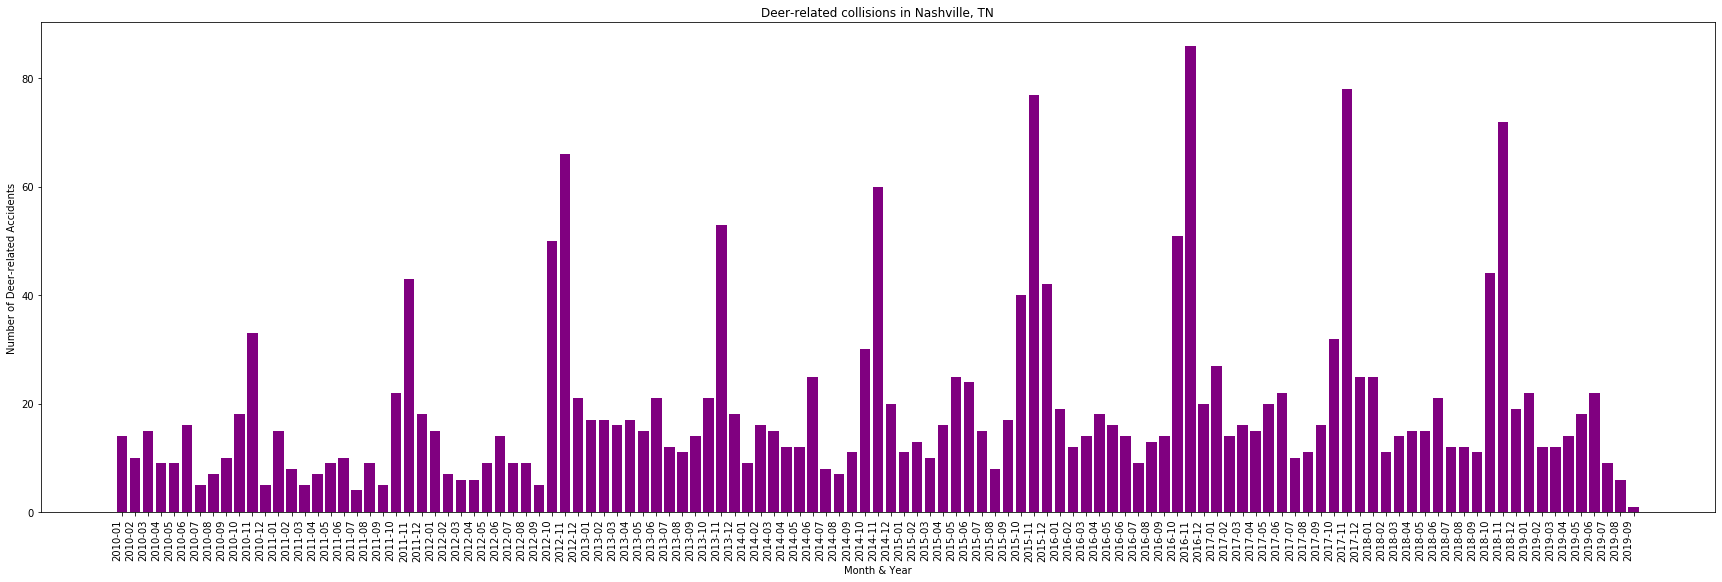

In [7]:
#plot deer-related accidents by month_year
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(30, 10))

x_axis = accident_monyr_df.index.to_series().astype(str)
tick_locations = [value for value in x_axis]

# rotate and align the tick labels so they look better
fig.autofmt_xdate()


# Add the x-axis and the y-axis to the plot
plt.bar(x_axis, 
        accident_monyr_df['Accident Count'],
        color='purple')
plt.xticks(tick_locations, rotation="vertical")

# Set title and labels for axes
ax.set(xlabel= "Month & Year",
       ylabel= "Number of Deer-related Accidents",
       title= "Deer-related collisions in Nashville, TN")

# Save the figure
plt.savefig("Deer_monthyr.png")


In [8]:
#create dataframe for accidents by month
deer_mon_df = deer_df.groupby('Month')

accident_cnt = deer_mon_df['Accident Number'].count()


accident_cnt_df = pd.DataFrame({'Accident Count': accident_cnt})

accident_cnt_df.info()
accident_cnt_df.sort_values('Month').astype(int)
accident_cnt_df.head(12)

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 9
Data columns (total 1 columns):
Accident Count    12 non-null int64
dtypes: int64(1)
memory usage: 192.0+ bytes


,Accident Count
Month,
1,174
10,308
11,568
12,188
2,120
3,123
4,129
5,148
6,189


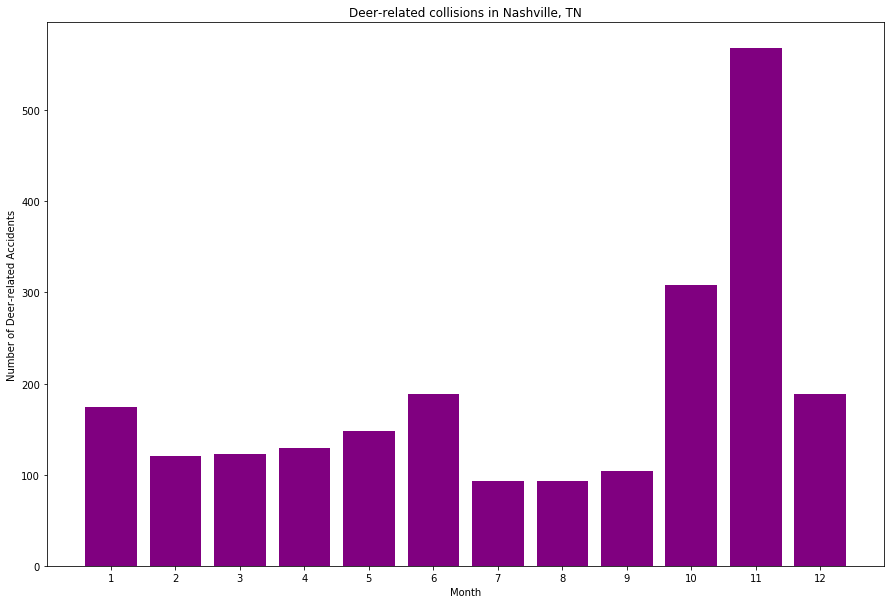

In [9]:
#plot deer-related accidents by month
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 10))

x_axis = accident_cnt_df.index.to_series().astype(int)
tick_locations = [value for value in x_axis]

# Add the x-axis and the y-axis to the plot
plt.bar(x_axis, 
        accident_cnt_df['Accident Count'],
        color='purple')

plt.xticks(tick_locations)

# Set title and labels for axes
ax.set(xlabel= "Month",
       ylabel= "Number of Deer-related Accidents",
       title= "Deer-related collisions in Nashville, TN")

# Save the figure
plt.savefig("Deer_month.png")


In [10]:
#create dataframe for accidents by year
deer_sumyr_df = deer_df.groupby('Year')
accident_cnt = deer_sumyr_df['Accident Number'].count()

accident_cntyr_df = pd.DataFrame({'Accident Count': accident_cnt})

accident_cntyr_df.info()
accident_cntyr_df.sort_values('Year')
accident_cntyr_df.head(12)

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2010 to 2019
Data columns (total 1 columns):
Accident Count    10 non-null int64
dtypes: int64(1)
memory usage: 160.0+ bytes


,Accident Count
Year,
2010,151
2011,155
2012,217
2013,232
2014,225
2015,298
2016,286
2017,286
2018,271


[Text(0, 0.5, 'Number of Deer-related Accidents'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Deer-related collisions in Nashville, TN')]

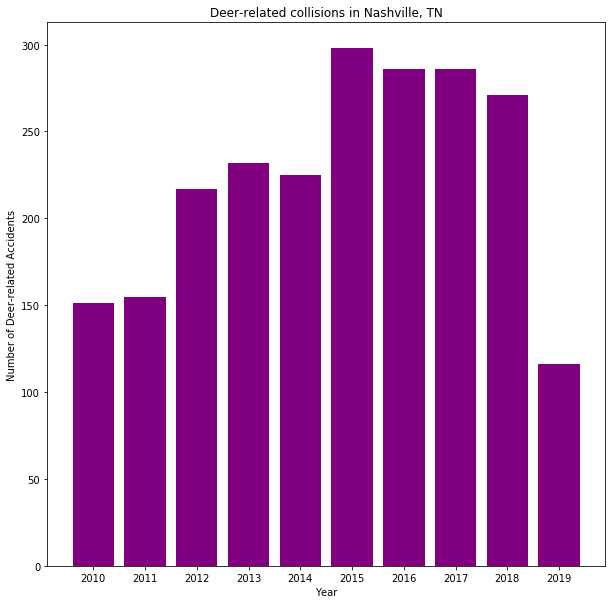

In [11]:
#plot deer-related accidents by year
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(10, 10))

x_axis = accident_cntyr_df.index.values

# Add the x-axis and the y-axis to the plot
plt.bar(x_axis, 
        accident_cntyr_df['Accident Count'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel= "Year",
       ylabel= "Number of Deer-related Accidents",
       title= "Deer-related collisions in Nashville, TN")
